<a href="https://colab.research.google.com/github/siddhartha18101/Stress-Detection_ECG/blob/master/Mental_Stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd '/content/drive/My Drive/Minor_1'

/content/drive/My Drive/Minor_1


In [ ]:
!ls

check  final_model1  MatData3  Mental_Stress.ipynb  WESAD  WESAD.zip


In [ ]:
!pip install emd

     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 10.8MB 9.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 


In [ ]:
!pip install EMD-signal
!pip install biosppy
!pip install hurst
!pip install sampen

     |████████████████████████████████| 225kB 12.9MB/s 
     |████████████████████████████████| 112kB 43.8MB/s 
     |████████████████████████████████| 133kB 42.9MB/s 
  Created wheel for pathos: filename=pathos-0.2.6-cp36-none-any.whl size=77673 sha256=397c06810bcb706898975238e4a1a496c435489a8054fc18bd9f62e3d109b6b2
  Stored in directory: /root/.cache/pip/wheels/3a/e8/c8/04cdd0c4bc6fbce35f642fc004244228916daae74bb0f482da
  Created wheel for ppft: filename=ppft-1.6.6.2-cp36-none-any.whl size=64743 sha256=b27912678eb3945b65bd412620e938fad3e4e6845900ba010a73cad084ce6317
  Stored in directory: /root/.cache/pip/wheels/db/d2/2d/0ee21ede61786bb13247dbc69079373fd500c2bb0481913084
  Created wheel for pox: filename=pox-0.2.8-cp36-none-any.whl size=28290 sha256=9e8d24e9d4d825bdbc70f68c6fde8f179bd5200e38968ca9ed86aa1dcc1c0349
  Stored in directory: /root/.cache/pip/wheels/39/ed/ce/a93103746b327e18bffaeb99ba0d57a88b392f31d719cea700
Successfully built pathos ppft pox
     |█████████████████████████

In [ ]:

import os
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from PyEMD import EMD
import emd
import pickle
import torch
import torch
import torch.nn.functional as F
import torch.nn as nn
import sys
from torch.autograd import Variable
import math
import glob
import scipy.io as sio
from hurst import compute_Hc
from sampen import sampen2


%matplotlib inline

In [ ]:
files = glob.glob('/content/drive/My Drive/Minor_1/WESAD/*')
files

['/content/drive/My Drive/Minor_1/WESAD/wesad_readme.pdf',
 '/content/drive/My Drive/Minor_1/WESAD/S10',
 '/content/drive/My Drive/Minor_1/WESAD/S11',
 '/content/drive/My Drive/Minor_1/WESAD/S13',
 '/content/drive/My Drive/Minor_1/WESAD/S14',
 '/content/drive/My Drive/Minor_1/WESAD/S15',
 '/content/drive/My Drive/Minor_1/WESAD/S16',
 '/content/drive/My Drive/Minor_1/WESAD/S17',
 '/content/drive/My Drive/Minor_1/WESAD/S2',
 '/content/drive/My Drive/Minor_1/WESAD/S3',
 '/content/drive/My Drive/Minor_1/WESAD/S4',
 '/content/drive/My Drive/Minor_1/WESAD/S5',
 '/content/drive/My Drive/Minor_1/WESAD/S6',
 '/content/drive/My Drive/Minor_1/WESAD/S7',
 '/content/drive/My Drive/Minor_1/WESAD/S8',
 '/content/drive/My Drive/Minor_1/WESAD/S9']

In [ ]:
!mkdir MatData3
%cd /content/drive/My Drive/Minor_1/MatData3
!mkdir Normal
!mkdir Stress
import glob
import scipy.io as sio
files = glob.glob('/content/drive/My Drive/Minor_1/WESAD/*')
files.remove(files[0])
files

mkdir: cannot create directory ‘MatData3’: File exists
/content/drive/My Drive/Minor_1/MatData3
mkdir: cannot create directory ‘Normal’: File exists
mkdir: cannot create directory ‘Stress’: File exists


['/content/drive/My Drive/Minor_1/WESAD/S10',
 '/content/drive/My Drive/Minor_1/WESAD/S11',
 '/content/drive/My Drive/Minor_1/WESAD/S13',
 '/content/drive/My Drive/Minor_1/WESAD/S14',
 '/content/drive/My Drive/Minor_1/WESAD/S15',
 '/content/drive/My Drive/Minor_1/WESAD/S16',
 '/content/drive/My Drive/Minor_1/WESAD/S17',
 '/content/drive/My Drive/Minor_1/WESAD/S2',
 '/content/drive/My Drive/Minor_1/WESAD/S3',
 '/content/drive/My Drive/Minor_1/WESAD/S4',
 '/content/drive/My Drive/Minor_1/WESAD/S5',
 '/content/drive/My Drive/Minor_1/WESAD/S6',
 '/content/drive/My Drive/Minor_1/WESAD/S7',
 '/content/drive/My Drive/Minor_1/WESAD/S8',
 '/content/drive/My Drive/Minor_1/WESAD/S9']

In [ ]:

# for x in files[7:]:
#   filename = x + '/S' + x[-1:] + '.pkl'
#   data_dict = open( filename, 'rb')
#   data1 = pickle.load(data_dict, encoding='latin1')
#   data = data1['signal']['chest']['ECG']
#   # data = ((data/(2^16))-0.5)*(3/1000)
#   data = np.ravel(data)
#   out = ecg.ecg(signal=data, sampling_rate=700., show=False)
#   length = len(out['filtered'])
#   k = round(length/5000)
#   a = 0
#   for i in range(1,k):
#     y = 5000*(i)
#     p = set(data1['label'][a:y])
#     if (p == {1}):
#       %cd Normal 
#       data = out['filtered'][a:y]
#       name = 'S'+ x[-1] +'norm'+str(i)+'.mat'
#       sio.savemat(name, {'data' :data} )
#       %cd ..
#     if (p == {2}):
#       %cd Stress
#       data = out['filtered'][a:y]
#       name = 'S' + x[-1]+'stress' + str(i) +'.mat'
#       sio.savemat(name, {'data' :data})
#       %cd ..
#     a = y

In [ ]:
normal_files = glob.glob('/content/drive/My Drive/Minor_1/MatData3/Normal/*')
stress_files = glob.glob('/content/drive/My Drive/Minor_1/MatData3/Stress/*')
file_to_label = {}
for x in normal_files:
  file_to_label[x] = torch.tensor([0,1], dtype=torch.float32 )
for x in stress_files:
  file_to_label[x] = torch.tensor([1,0], dtype=torch.float32)

len(stress_files)

1226

In [ ]:
len(normal_files)

1805

In [ ]:
len(stress_files)

1226

In [ ]:
import random 
random.shuffle(normal_files)
random.shuffle(stress_files)
train_files = normal_files[0:1000] + stress_files[0:1000]
test_files = normal_files[1000:1220] + stress_files[1000:1220]
random.shuffle(train_files)
random.shuffle(test_files)

In [ ]:
len(test_files)

440

In [ ]:
len(train_files)

2000

In [ ]:
data = sio.loadmat(train_files[0])['data']
step = 1/700
# time = np.arange(0,500*step, step )
# time = time.reshape((500,-1))
data = np.transpose(data)

imfs = emd.sift.sift(data)



In [ ]:
imfs[:,0].shape

(5000,)

In [ ]:
H, c, data1 = compute_Hc(data, kind='change', simplified=True )

In [ ]:
sampentropy = sampen2(data)

In [ ]:
sampentropy[-1][1]

0.004654247875718569

In [ ]:

class Stress_Model(nn.Module):
    def __init__(self):
          super(Stress_Model, self).__init__()

          self.conv1 = nn.Sequential(
            nn.Conv1d (1, 32, 32, 2 ),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(8, stride=2 ),
            nn.LeakyReLU()
            ) 

          self.conv2 = nn.Sequential(
            
            nn.Conv1d(32,64, 8, 2),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(8, stride=2 ),
            nn.LeakyReLU()
            ) 

          self.conv3 = nn.Sequential(
            nn.BatchNorm1d(64),
            nn.MaxPool1d(8, stride=1 ),
            nn.ReLU(),
            nn.Dropout(),
            nn.Conv1d(64,64, 4, 1 ),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(8, stride=1 ),
            nn.ReLU(),
            nn.Conv1d(64,64, 4, 1 )
            ) 

          self.conv4 = nn.Sequential(
            nn.Conv1d(64,64,4,1),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(8, stride=1 ),
            nn.ReLU(),
            nn.Conv1d(64,64, 4, 1 ),
            nn.BatchNorm1d(64)
            ) 

          self.conv5 = nn.Sequential(
            nn.Conv1d(64,64,64,4),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(8, stride=1 ),
            nn.ReLU()
            )

          self.dp = nn.Dropout()
          self.conv = nn.Conv1d(64,64, 128, 4)
          self.bn = nn.BatchNorm1d(64)
          self.relu = nn.ReLU()

          self.flat = nn.Flatten()
          self.fc = nn.Linear(14848, 2048)
          self.fc1 = nn.Linear(2048, 512)
          self.fc2 = nn.Linear(512, 64)
          self.fc3 = nn.Linear(64,2)
          
    def forward(self, x):
        
        lay1 = self.conv1(x)
        lay2 = self.conv2(lay1)
        lay3 = self.conv4(lay2)
        lay  = self.conv3(lay3)
        lay  = self.conv3(lay)
        lay  = self.conv3(lay)

        # lay = layp + lay2
        # for i in range(1,4):
        #   lay = self.conv3(lay)
        #   lay = lay +layp

        out = self.bn(lay)
        out = self.relu(out)
        out = self.flat(out)
        out = self.fc(out)
        out = self.dp(out)
        out = self.fc1(out)
        # out = self.dp(out)
        out = self.fc2(out)
        # out = self.dp(out)
        out = self.fc3(out)
        
        

        return out

In [ ]:

model = Stress_Model()
optimizer = torch.optim.Adam(model.parameters() ,lr = 0.0001 )
criterion = nn.BCEWithLogitsLoss()

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    j = 0
    cor = 0
    running_loss = 0.0
    for i, x in enumerate(train_files[0:2000]):  
        # Move tensors to the configured device
        # images = images.reshape(-1, 28*28).to(device)
        # labels = labels.to(device)
        data = sio.loadmat(x)['data']
        step = 1/700
        data = np.transpose(data)

        # imfs = emd.sift.sift(data)

        # inputs = []
        # mean = np.mean(data)
        # inputs.append(mean)
        # std = np.std(data)
        # inputs.append(std)
        # H, c, data1 = compute_Hc(data, kind='change', simplified=True )
        # inputs.append(H)
        # sampentropy = sampen2(data)
        # inputs.append(sampentropy[-1][1])


        # mean1 = np.mean(imfs[:,0])
        # inputs.append(mean1)
        # std1 = np.std(imfs[:,0])
        # inputs.append(std1)
        # H1, c, data1 = compute_Hc(imfs[:,0], kind='change', simplified=True )
        # inputs.append(H1)
        # sampentropy1 = sampen2(imfs[:,0])
        # inputs.append(sampentropy1[-1][1])


        # mean2 = np.mean(imfs[:,1])
        # inputs.append(mean2)
        # std2 = np.std(imfs[:,1])
        # inputs.append(std2)
        # H2, c, data1 = compute_Hc(imfs[:,1], kind='change', simplified=True )
        # inputs.append(H2)
        # sampentropy2 = sampen2(imfs[:,1])
        # inputs.append(sampentropy2[-1][1])
        
        inputs = torch.tensor(data, dtype = torch.float32)
        inputs = inputs.reshape((1,1,5000))

        labels = file_to_label[x]
        labels = labels.reshape((1,2))
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if (torch.argmax(labels) == torch.argmax(outputs)):
           cor = cor+1
        j = j+1
    print('Epoch: {} | Loss: {} | Acc: {}'.format(epoch, running_loss/2000, cor/2000))


Epoch: 0 | Loss: 0.16639488681175169 | Acc: 0.9315
Epoch: 1 | Loss: 0.14497877302522072 | Acc: 0.948
Epoch: 2 | Loss: 0.13912722988150694 | Acc: 0.952
Epoch: 3 | Loss: 0.13876000953186923 | Acc: 0.9495
Epoch: 4 | Loss: 0.12297266596183795 | Acc: 0.9585
Epoch: 5 | Loss: 0.11142356521980869 | Acc: 0.961


KeyboardInterrupt: ignored

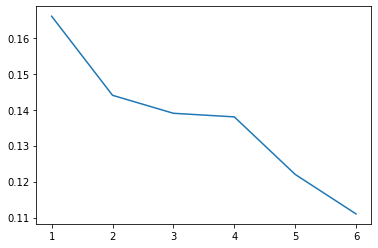

In [ ]:
losses = [0.166,0.144,0.139, 0.138,0.122,0.111]
epoch = np.arange(1,7,1)
plt.plot(epoch,losses)

In [ ]:
model = Stress_Model()
model.load_state_dict(torch.load('/content/drive/My Drive/Minor_1/final_model1') )

<All keys matched successfully>

In [ ]:
with torch.no_grad():
    correct = 0
    ytrue = []
    ypred = []
    total = 0
    for x in test_files:
        data = sio.loadmat(x)['data']
        step = 1/700
        data = np.transpose(data)
        inputs = torch.tensor(data, dtype = torch.float32)
        inputs = inputs.reshape((1,1,5000))

        labels = file_to_label[x]
        labels = labels.reshape((1,2))
        labels = file_to_label[x]
        labels = labels.reshape((1,2))
        outputs = model(inputs)
        # loss = criterion(outputs, labels)
        # running_loss+=loss
        # print(outputs.argmax())
        # print(loss)
        ytrue.append(labels.argmax())
        ypred.append(outputs.argmax())
        total += 1
        if (labels.argmax() == outputs.argmax()):
          correct+=1

    print('Accuracy of the network: {} %'.format(100 * correct / total))


Accuracy of the network: 96.36363636363636 %


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/Minor_1/final_model1')

In [ ]:
from sklearn import metrics


In [ ]:
metrics.accuracy_score(ytrue,ypred)

0.9636363636363636

In [ ]:
metrics.precision_score(ytrue,ypred)

0.9903846153846154

In [ ]:
metrics.recall_score(ytrue,ypred)

0.9363636363636364

In [ ]:
metrics.f1_score(ytrue,ypred)

0.9626168224299064

In [ ]:
metrics.roc_auc_score( ytrue, ypred )

0.9636363636363637

In [ ]:
metrics.ConfusionMatrixDisplay( )

In [ ]:
confusion = metrics.confusion_matrix(ytrue,ypred)

In [ ]:
confusion


array([[218,   2],
       [ 14, 206]])

In [ ]:
print(metrics.classification_report(ytrue,ypred,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       220
           1       0.99      0.94      0.96       220

    accuracy                           0.96       440
   macro avg       0.97      0.96      0.96       440
weighted avg       0.97      0.96      0.96       440



In [ ]:
with torch.no_grad():
    correct = 0
    # ytrue = []
    # ypred = []
    total = 0
    for x in normal_files[1000:1100]:
        data = sio.loadmat(x)['data']
        step = 1/700
        data = np.transpose(data)
        inputs = torch.tensor(data, dtype = torch.float32)
        inputs = inputs.reshape((1,1,5000))

        labels = file_to_label[x]
        labels = labels.reshape((1,2))
        labels = file_to_label[x]
        labels = labels.reshape((1,2))
        outputs = model(inputs)
        # loss = criterion(outputs, labels)
        # running_loss+=loss
        # print(outputs.argmax())
        # print(loss)
        # ytrue.append(labels.argmax())
        # ypred.append(outputs.argmax())
        total += 1
        if (labels.argmax() == outputs.argmax()):
          correct+=1

    print('Accuracy of the network: {} %'.format(100 * correct / total))


Accuracy of the network: 96.0 %


In [ ]:
correct, total

(96, 100)

In [ ]:
from torchsummary import summary

summary(model, input_size=(1,5000))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 32, 2485]           1,056
       BatchNorm1d-2             [-1, 32, 2485]              64
         MaxPool1d-3             [-1, 32, 1239]               0
         LeakyReLU-4             [-1, 32, 1239]               0
            Conv1d-5              [-1, 64, 616]          16,448
       BatchNorm1d-6              [-1, 64, 616]             128
         MaxPool1d-7              [-1, 64, 305]               0
         LeakyReLU-8              [-1, 64, 305]               0
            Conv1d-9              [-1, 64, 302]          16,448
      BatchNorm1d-10              [-1, 64, 302]             128
        MaxPool1d-11              [-1, 64, 295]               0
             ReLU-12              [-1, 64, 295]               0
           Conv1d-13              [-1, 64, 292]          16,448
      BatchNorm1d-14              [-1, 